In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
import shap
from sklearn.model_selection import KFold
import scipy.stats as stats
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### The Random Forest model on the dataset with all extreme outliers

In [26]:
#cleaned dataset
df = pd.read_csv("auto_data_cleaned_16_09_2024.csv")

# the models will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['model'])
df['Modell_encoded'] = target_encoder.fit_transform(df['model'], df['price_in_euro'])  # 'Preis' ist die Zielvariable


# the brand will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['brand'])
df['Brand_encoded'] = target_encoder.fit_transform(df['brand'], df['price_in_euro'])  # 'Preis' ist die Zielvariable

df=df.drop(columns=['year', 'offer_description', ])

df = pd.get_dummies(df, columns=[ 'fuel_type', 'transmission_type','color'], dtype='int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238302 entries, 0 to 238301
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   brand                             238302 non-null  object 
 1   model                             238302 non-null  object 
 2   price_in_euro                     238302 non-null  float64
 3   power_ps                          238302 non-null  float64
 4   fuel_consumption_l_100km          238302 non-null  float64
 5   mileage_in_km                     238302 non-null  float64
 6   age                               238302 non-null  float64
 7   Modell_encoded                    238302 non-null  float64
 8   Brand_encoded                     238302 non-null  float64
 9   fuel_type_CNG                     238302 non-null  int64  
 10  fuel_type_Diesel                  238302 non-null  int64  
 11  fuel_type_Diesel Hybrid           238302 non-null  i

In [27]:
#cleaned dropped dataset
df_drop = pd.read_csv("auto_data_cleaned_drop__15_10_2024.csv")


# the models will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['model'])
df_drop['Modell_encoded'] = target_encoder.fit_transform(df['model'], df['price_in_euro'])  # 'Preis' ist die Zielvariable


# the brand will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['brand'])
df_drop['Brand_encoded'] = target_encoder.fit_transform(df['brand'], df['price_in_euro'])  # 'Preis' ist die Zielvariable

df_drop=df_drop.drop(columns=['year',  'offer_description'])

df_drop = pd.get_dummies(df_drop, columns=[ 'fuel_type', 'transmission_type','color'], dtype='int')
df_drop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213668 entries, 0 to 213667
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   brand                             213668 non-null  object 
 1   model                             213668 non-null  object 
 2   price_in_euro                     213668 non-null  float64
 3   power_ps                          213668 non-null  float64
 4   fuel_consumption_l_100km          213668 non-null  float64
 5   mileage_in_km                     213668 non-null  float64
 6   age                               213668 non-null  float64
 7   Modell_encoded                    213668 non-null  float64
 8   Brand_encoded                     213668 non-null  float64
 9   fuel_type_CNG                     213668 non-null  int64  
 10  fuel_type_Diesel                  213668 non-null  int64  
 11  fuel_type_Diesel Hybrid           213668 non-null  i

In [28]:
# Splitting the data into training and test sets
X = df.drop(['price_in_euro', 'model', 'brand'], axis=1)  # Features
y = df['price_in_euro']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the data into training and test sets
X_d = df_drop.drop(['price_in_euro', 'model', 'brand'], axis=1)  # Features
y_d = df_drop['price_in_euro']  # Target variable

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)


In [29]:
# Initialize the model with default parameters
rf = RandomForestRegressor(n_estimators=100, max_depth=None)
# Train the model
rf.fit(X_train, y_train)

#  Evaluate the model on the Test Set
y_pred = rf.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5

print(f"Test MAE - full dataset: {test_mae}")
print(f"Test Set MSE - full dataset: {mse_test}")
print(f"Test R² - full dataset: {test_r2}")
print(f"Test RMSE - full dataset: {rmse_test:.2f}")

# Initialize the model with default parameters
rf_d = RandomForestRegressor(n_estimators=200, max_depth=20)
# Train the model
rf_d.fit(X_train_d, y_train_d)

#  Evaluate the model on the Test Set
y_pred_d = rf_d.predict(X_test_d)
test_mae_d = mean_absolute_error(y_test_d, y_pred_d)
test_r2_d = r2_score(y_test_d, y_pred_d)
mse_test_d = mean_squared_error(y_test_d, y_pred_d)
rmse_test_d = mse_test_d ** 0.5

print(f"Test MAE - dropped dataset: {test_mae_d}")
print(f"Test Set MSE - dropped dataset: {mse_test_d}")
print(f"Test R² - dropped dataset: {test_r2_d}")
print(f"Test RMSE - dropped dataset: {rmse_test_d:.2f}")

Test MAE - full dataset: 3403.5264564855065
Test Set MSE - full dataset: 185566473.0756488
Test R² - full dataset: 0.8361924562913726
Test RMSE - full dataset: 13622.28
Test MAE - dropped dataset: 3671.793837713369
Test Set MSE - dropped dataset: 177279105.95689717
Test R² - dropped dataset: 0.8179899680623839
Test RMSE - dropped dataset: 13314.62


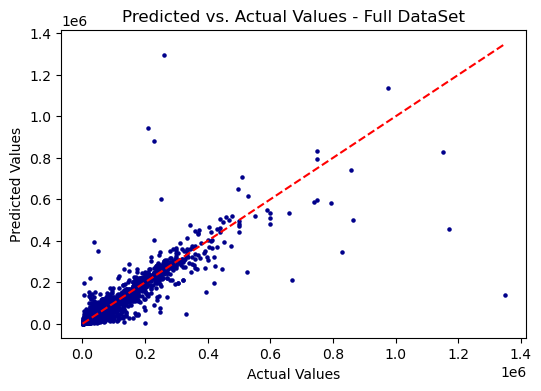

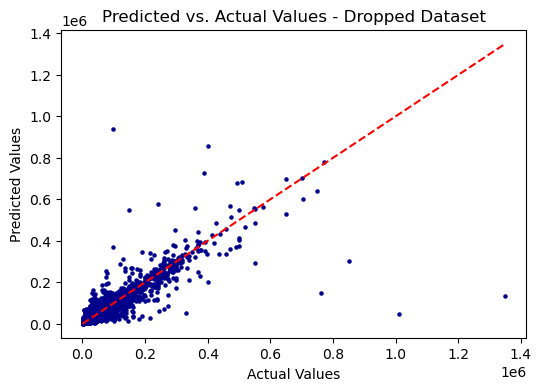

In [9]:
# Plot Predicted vs. Actual Values
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, s=5, color='darkblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values - Full DataSet')
plt.show()

# Plot Predicted vs. Actual Values
plt.figure(figsize=(6,4))
plt.scatter(y_test_d, y_pred_d, s=5, color='darkblue')
plt.plot([min(y_test_d), max(y_test_d)], [min(y_test_d), max(y_test_d)], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values - Dropped Dataset')
plt.show()


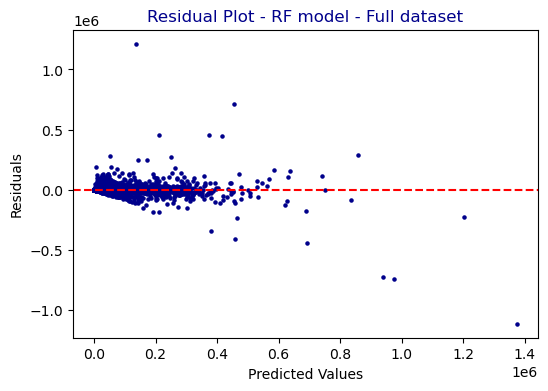

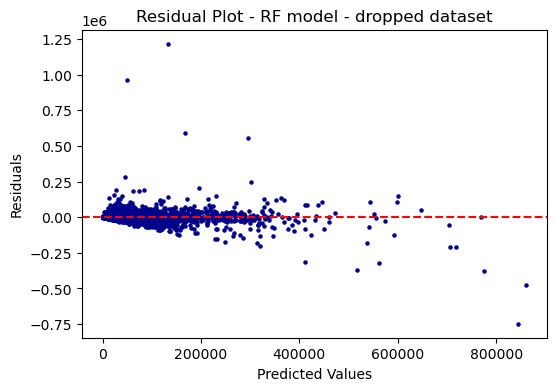

In [32]:
# Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, s = 5, color='darkblue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - RF model - Full dataset', color='darkblue')
plt.show()


# Plot Residuals
residuals = y_test_d - y_pred_d
plt.figure(figsize=(6,4))
plt.scatter(y_pred_d, residuals, s = 5, color='darkblue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - RF model - dropped dataset')
plt.show()

                             Feature    Importance
4                     Modell_encoded  4.853594e-01
0                           power_ps  1.620622e-01
2                      mileage_in_km  1.373207e-01
3                                age  1.006963e-01
1           fuel_consumption_l_100km  4.705774e-02
5                      Brand_encoded  2.108003e-02
26                        color_grey  1.547508e-02
15                  fuel_type_Petrol  7.274986e-03
20                       color_black  4.717171e-03
7                   fuel_type_Diesel  2.868004e-03
11                  fuel_type_Hybrid  2.700788e-03
21                        color_blue  2.372411e-03
25                       color_green  2.107398e-03
28                         color_red  1.950403e-03
31                       color_white  1.380122e-03
29                      color_silver  1.320358e-03
23                       color_brown  9.622932e-04
32                      color_yellow  8.870265e-04
17          transmission_type_M

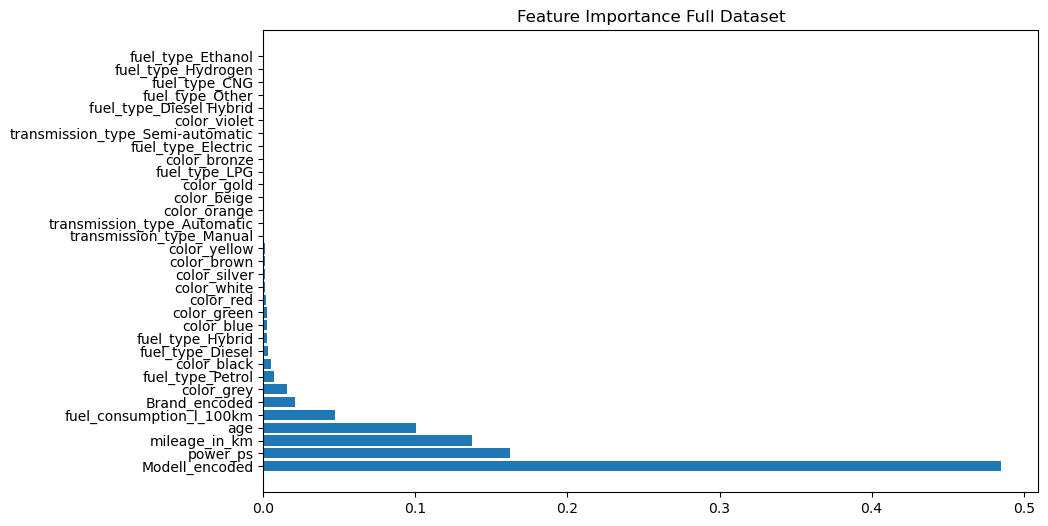

                             Feature    Importance
0                           power_ps  5.295239e-01
2                      mileage_in_km  1.742943e-01
3                                age  1.380225e-01
1           fuel_consumption_l_100km  5.324237e-02
5                      Brand_encoded  3.576184e-02
4                     Modell_encoded  2.066881e-02
26                        color_grey  1.287097e-02
11                  fuel_type_Hybrid  6.340072e-03
15                  fuel_type_Petrol  6.165555e-03
20                       color_black  4.701088e-03
7                   fuel_type_Diesel  4.683920e-03
31                       color_white  2.402437e-03
21                        color_blue  2.350377e-03
29                      color_silver  1.639085e-03
28                         color_red  1.392160e-03
25                       color_green  1.289954e-03
17          transmission_type_Manual  1.001294e-03
16       transmission_type_Automatic  9.621797e-04
13                     fuel_typ

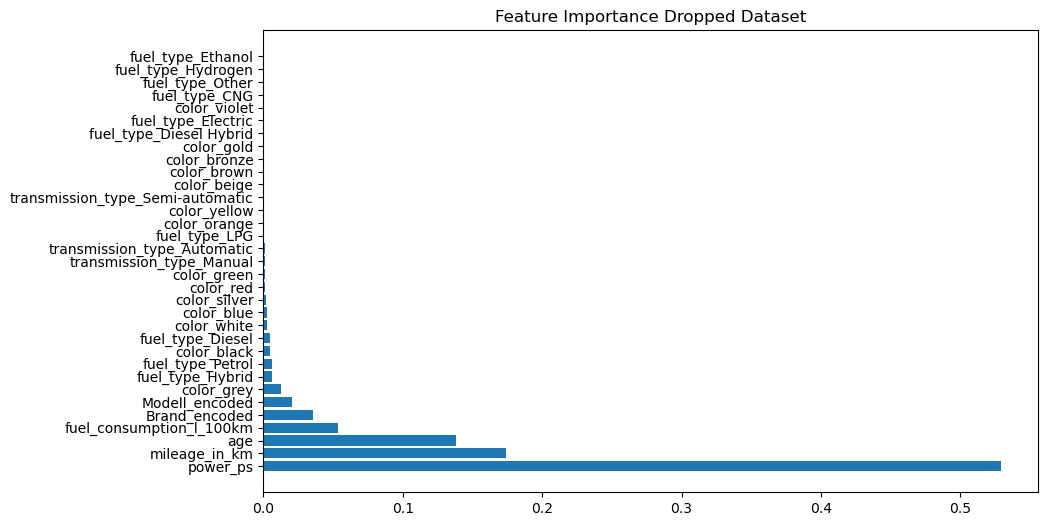

In [7]:
# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance Full Dataset')
plt.show()

# Feature importance
importances = rf_d.feature_importances_
feature_names = X_d.columns
feature_importance_df_d = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df_d = feature_importance_df_d.sort_values(by='Importance', ascending=False)

print(feature_importance_df_d)



plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_d['Feature'], feature_importance_df_d['Importance'])
plt.title('Feature Importance Dropped Dataset')
plt.show()

### Fine-tuning of the Random Forest with GridSearchCV

In [8]:
# Initialize the model with default parameters
rf = RandomForestRegressor(n_estimators=200, max_depth=20)

# Define the grid of hyperparameters to search

param_grid = {
    
    'min_samples_split':[2,5,7],
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider
    'bootstrap': [True, False],                # Whether to bootstrap samples or not
}



# Set up GridSearchCV with KNN Regressor and 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model (dropped dataset)
grid_search.fit(X_train_d, y_train_d)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_regressor = grid_search.best_estimator_

# Predict using the best estimator
y_pred_d = best_rf_regressor.predict(X_test_d)



# Calculate the R² score
r2 = r2_score(y_test_d, y_pred_d)

# Print the R² score
print(f"R² Score - Dropped data: {r2:.4f}")
# Evaluate the model
mse = mean_squared_error(y_test_d, y_pred_d)
rmse = mse ** 0.5

# Calculate metrics on the original scale
mse_test = mean_squared_error(y_test_d, y_pred_d)
mae_test = mean_absolute_error(y_test_d, y_pred_d)
print(f"Test Set MSE - Dropped data: {mse_test}")
print(f"Test Set MAE - Dropped data: {mae_test}")
print(f"Test RMSE: {rmse:.2f}")

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
  

Best Parameters: {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
R² Score - Dropped data: 0.8308
Test Set MSE - Dropped data: 164785063.5986521
Test Set MAE - Dropped data: 3951.1710188132347
Test RMSE: 12836.86


In [9]:
# Initialize the model with default parameters
rf = RandomForestRegressor(n_estimators=100, max_depth=None)

# Define the grid of hyperparameters to search
param_grid = {
    'min_samples_split':[2,5,7],
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider
    'bootstrap': [True, False],                # Whether to bootstrap samples or not
}


# Set up GridSearchCV with KNN Regressor and 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_regressor = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_rf_regressor.predict(X_test)



# Calculate the R² score
r2 = r2_score(y_test, y_pred)

# Print the R² score
print(f"R² Score - Full data: {r2:.4f}")
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0. 

# Calculate metrics on the original scale
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
print(f"Test Set MSE - Full data: {mse_test}")
print(f"Test Set MAE - full data: {mae_test}")
print(f"Test RMSE: {rmse:.2f}")

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
  

Best Parameters: {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7}
R² Score - Full data: 0.8842
Test Set MSE - Full data: 131153004.19152294
Test Set MAE - full data: 3323.4891645189887
Test RMSE: 1.00


## Dataset without extreme price values:
I decided to set up the threshold for the extreme values, because just to remove outliers means to remove all the cars with the price higher 50000 and this is not correct, my threshold was set up on around 400 000 euro price, which included the most of the luxury cars, and did not include some extremely expensive cars

In [40]:
#cleaned dataset
df = pd.read_csv("auto_data_cleaned_16_09_2024.csv")

# the models will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['model'])
df['Modell_encoded'] = target_encoder.fit_transform(df['model'], df['price_in_euro'])  # 'Preis' ist die Zielvariable


# the brand will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['brand'])
df['Brand_encoded'] = target_encoder.fit_transform(df['brand'], df['price_in_euro'])  # 'Preis' ist die Zielvariable

df=df.drop(columns=['year',  'offer_description', ])

df = pd.get_dummies(df, columns=[ 'fuel_type', 'transmission_type','color'], dtype='int')

# Remove outliers using Z-score for price and mileage
df_clean = df[(np.abs(stats.zscore(df['price_in_euro'])) < 10)]  # 10 is the higher threshold for extreme values
df_clean = df_clean[(np.abs(stats.zscore(df_clean['mileage_in_km'])) < 4)]  # Do the same for mileage



In [41]:
#cleaned dropped dataset
df_drop = pd.read_csv("auto_data_cleaned_drop__15_10_2024.csv")


# the models will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['model'])
df_drop['Modell_encoded'] = target_encoder.fit_transform(df['model'], df['price_in_euro'])  # 'Preis' ist die Zielvariable


# the brand will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['brand'])
df_drop['Brand_encoded'] = target_encoder.fit_transform(df['brand'], df['price_in_euro'])  # 'Preis' ist die Zielvariable

df_drop=df_drop.drop(columns=['year',  'offer_description'])

df_drop = pd.get_dummies(df_drop, columns=[ 'fuel_type', 'transmission_type','color'], dtype='int')

# Remove outliers using Z-score for price and mileage
df_clean_d = df_drop[(np.abs(stats.zscore(df_drop['price_in_euro'])) < 10)]  # 10 is the higher threshold for extreme values
df_clean_d = df_clean_d[(np.abs(stats.zscore(df_clean_d['mileage_in_km'])) < 4)]  # Do the same for mileage




In [42]:
# Splitting the data into training and test sets
X = df_clean.drop(['price_in_euro', 'model', 'brand'], axis=1)  # Features
y = df_clean['price_in_euro']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the data into training and test sets
X_d = df_clean_d.drop(['price_in_euro', 'model', 'brand'], axis=1)  # Features
y_d = df_clean_d['price_in_euro']  # Target variable

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)

In [36]:
# Initialize the model with default parameters
rf = RandomForestRegressor(n_estimators=200, max_depth=20)
# Train the model
rf.fit(X_train, y_train)

#  Evaluate the model on the Test Set
y_pred = rf.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5

print(f"Test MAE - full dataset: {test_mae}")
print(f"Test Set MSE - full dataset: {mse_test}")
print(f"Test R² - full dataset: {test_r2}")
print(f"Test RMSE - full dataset: {rmse_test:.2f}")

# Initialize the model with default parameters
rf_d = RandomForestRegressor(n_estimators=200, max_depth=20)
# Train the model
rf_d.fit(X_train_d, y_train_d)

#  Evaluate the model on the Test Set
y_pred_d = rf_d.predict(X_test_d)
test_mae_d = mean_absolute_error(y_test_d, y_pred_d)
test_r2_d = r2_score(y_test_d, y_pred_d)
mse_test_d = mean_squared_error(y_test_d, y_pred_d)
rmse_test_d = mse_test_d ** 0.5

print(f"Test MAE - dropped dataset: {test_mae_d}")
print(f"Test Set MSE - dropped dataset: {mse_test_d}")
print(f"Test R² - dropped dataset: {test_r2_d}")
print(f"Test RMSE - dropped dataset: {rmse_test_d:.2f}")


Test MAE - full dataset: 3002.330922832311
Test Set MSE - full dataset: 45123288.22793577
Test R² - full dataset: 0.9235675837016912
Test RMSE - full dataset: 6717.39
Test MAE - dropped dataset: 3347.8917584698656
Test Set MSE - dropped dataset: 52723854.16892502
Test R² - dropped dataset: 0.8999481693855752
Test RMSE - dropped dataset: 7261.12


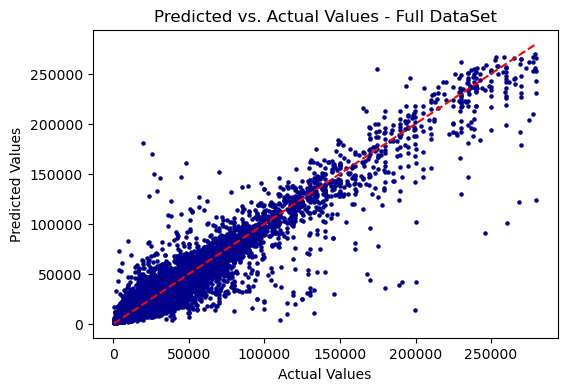

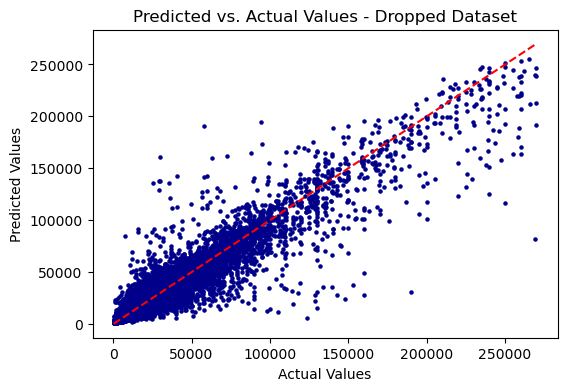

In [37]:
# Plot Predicted vs. Actual Values
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, s=5, color='darkblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values - Full DataSet')
plt.show()

# Plot Predicted vs. Actual Values
plt.figure(figsize=(6,4))
plt.scatter(y_test_d, y_pred_d, s=5, color='darkblue')
plt.plot([min(y_test_d), max(y_test_d)], [min(y_test_d), max(y_test_d)], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values - Dropped Dataset')
plt.show()


                             Feature    Importance
4                     Modell_encoded  6.042687e-01
3                                age  1.480847e-01
0                           power_ps  9.739010e-02
2                      mileage_in_km  9.105279e-02
5                      Brand_encoded  2.070823e-02
1           fuel_consumption_l_100km  1.952624e-02
7                   fuel_type_Diesel  2.796034e-03
20                       color_black  2.134357e-03
26                        color_grey  1.591929e-03
15                  fuel_type_Petrol  1.445043e-03
29                      color_silver  1.418510e-03
21                        color_blue  1.396854e-03
31                       color_white  1.375486e-03
28                         color_red  1.121851e-03
17          transmission_type_Manual  1.059735e-03
25                       color_green  1.022969e-03
16       transmission_type_Automatic  9.705955e-04
11                  fuel_type_Hybrid  4.493893e-04
19                       color_

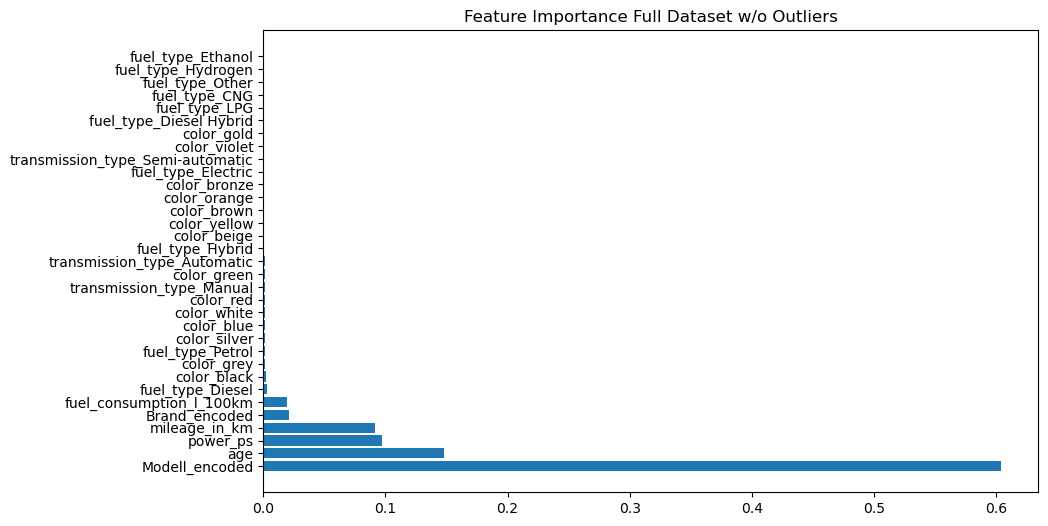

                             Feature    Importance
0                           power_ps  5.561170e-01
3                                age  1.701861e-01
2                      mileage_in_km  1.252594e-01
5                      Brand_encoded  5.246601e-02
1           fuel_consumption_l_100km  4.582661e-02
4                     Modell_encoded  1.693346e-02
7                   fuel_type_Diesel  9.647129e-03
15                  fuel_type_Petrol  3.630306e-03
20                       color_black  2.490042e-03
17          transmission_type_Manual  2.122178e-03
26                        color_grey  1.846986e-03
21                        color_blue  1.840078e-03
29                      color_silver  1.816553e-03
16       transmission_type_Automatic  1.813451e-03
31                       color_white  1.539758e-03
28                         color_red  1.428462e-03
25                       color_green  1.287129e-03
11                  fuel_type_Hybrid  1.088527e-03
32                      color_y

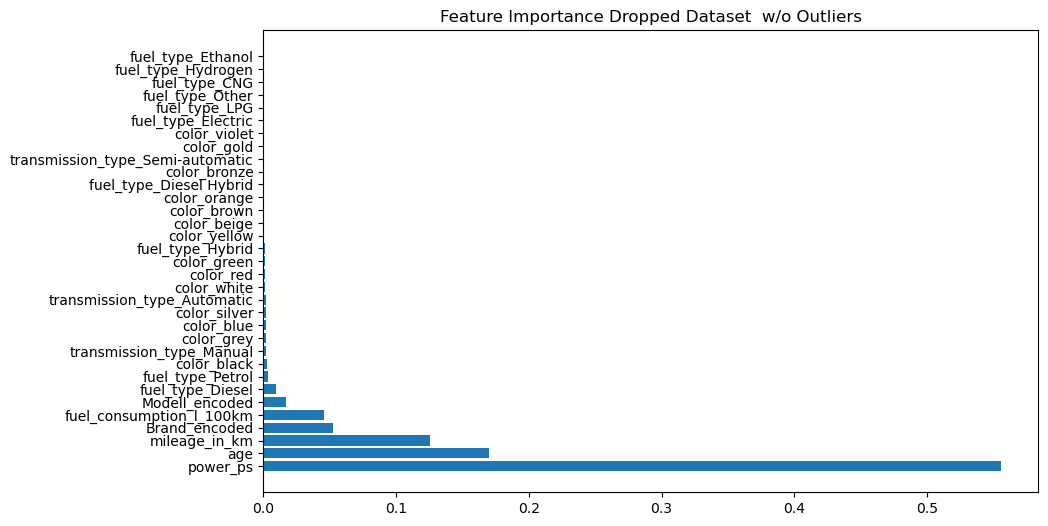

In [149]:
# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance Full Dataset w/o Outliers')
plt.show()

# Feature importance
importances = rf_d.feature_importances_
feature_names = X_d.columns
feature_importance_df_d = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df_d = feature_importance_df_d.sort_values(by='Importance', ascending=False)

print(feature_importance_df_d)



plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_d['Feature'], feature_importance_df_d['Importance'])
plt.title('Feature Importance Dropped Dataset  w/o Outliers')
plt.show()

### The fine-tuning of hyperparameters with GridSearchCV:

In [152]:
# Initialize the model with default parameters
rf = RandomForestRegressor(n_estimators=200, max_depth=20)

# Define the grid of hyperparameters to search
param_grid = {
    'min_samples_split':[2,5,7],
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider
    'bootstrap': [True, False],                # Whether to bootstrap samples or not
}


# Set up GridSearchCV with KNN Regressor and 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_regressor = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_rf_regressor.predict(X_test)



# Calculate the R² score
r2 = r2_score(y_test, y_pred)

# Print the R² score
print(f"R² Score - Full data: {r2:.4f}")
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Calculate metrics on the original scale
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
print(f"Test Set MSE - Full data: {mse_test}")
print(f"Test Set MAE - full data: {mae_test}")
print(f"Test RMSE: {rmse:.2f}")

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
  

Best Parameters: {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
R² Score - Full data: 0.9242
Test Set MSE - Full data: 44765945.22974759
Test Set MAE - full data: 3089.609575251741
Test RMSE: 6690.74


### These results from this Random Forest model for car price prediction are quite solid! Here's an interpretation of the key metrics:



### 1. R² Score (0.8957):
An R² score of 0.9019 indicates that 90.19% of the variance in car prices can be explained by the model based on the input features (e.g., mileage, age, power, etc.). This is a high R², suggesting that the model captures most of the underlying relationships between the features and the car prices.
For predictive models in areas like car price prediction, an R² above 0.90 is generally considered excellent, especially since factors like market trends or consumer preferences can introduce additional noise that a model may not capture.


### 2. Test Set MSE (14,638,979)
The Mean Squared Error (MSE) is the average squared difference between actual and predicted prices. While it’s useful for optimization, it can be hard to interpret directly because it’s in squared units of the target variable (i.e., price squared).
In this case, the MSE value is around 13.8 million, which seems large, but this is due to the fact that price predictions deal with higher values (especially in euros).


### 3. Test Set MAE (2366.96)
The Mean Absolute Error (MAE) is more interpretable because it's in the same units as the target variable (price in euros). This value of 2,327.55 euros means that, on average, the model’s price predictions deviate from the actual price by about 2,327 euros.
In car price prediction, this level of error is fairly good, especially considering that prices can vary widely due to factors not always captured in the dataset (e.g., specific vehicle condition, regional demand).


### 4. Test RMSE (3826.09)
The Root Mean Squared Error (RMSE) of 3,713.43 euros indicates that, on average, the model’s predictions are off by this amount. The RMSE penalizes larger errors more than smaller ones (since it squares them before averaging), so a relatively low RMSE is a good sign.
This RMSE suggests that most of the  predictions are within about 3,700 euros of the actual car prices, which can be acceptable in a domain where car prices can range from a few thousand to tens of thousands of euros.

In [51]:
# Initialize the model with default parameters
rf = RandomForestRegressor(n_estimators=200, max_depth=20)

# Define the grid of hyperparameters to search
param_grid = {
    'min_samples_split':[2,5,7],
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider
    'bootstrap': [True, False],                # Whether to bootstrap samples or not
}


# Set up GridSearchCV with KNN Regressor and 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model
grid_search.fit(X_train_d, y_train_d)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_regressor = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_rf_regressor.predict(X_test_d)



# Calculate the R² score
r2 = r2_score(y_test_d, y_pred)

# Print the R² score
print(f"R² Score - Dropped data: {r2:.4f}")
# Evaluate the model
mse = mean_squared_error(y_test_d, y_pred)
rmse = mse ** 0.5

# Calculate metrics on the original scale
mse_test = mean_squared_error(y_test_d, y_pred)
mae_test = mean_absolute_error(y_test_d, y_pred)
print(f"Test Set MSE - Dropped data: {mse_test}")
print(f"Test Set MAE - Dropped data: {mae_test}")
print(f"Test RMSE: {rmse:.2f}")

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
  

Best Parameters: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
R² Score - Dropped data: 0.8994
Test Set MSE - Dropped data: 71709070.13437034
Test Set MAE - Dropped data: 3753.7770139022837
Test RMSE: 8468.12


Test MAE - full dataset: 3169.735188376877
Test Set MSE - full dataset: 46459844.06156218
Test R² - full dataset: 0.9357329045395825


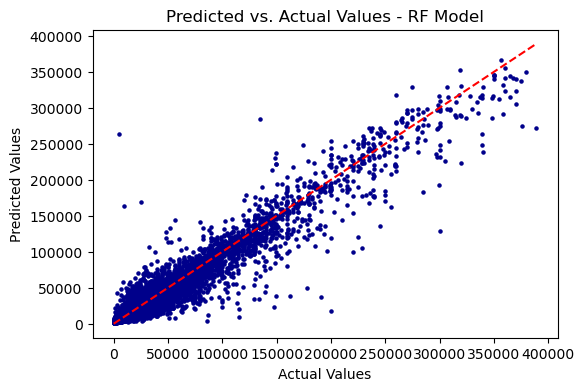

In [43]:
# Initialize the model with default parameters=1
rf = RandomForestRegressor(n_estimators=200, max_depth=20, bootstrap =False, max_features = 'sqrt', min_samples_leaf=1, min_samples_split=2)
# Train the model
rf.fit(X_train, y_train)

# Step 4: Evaluate the model on the Test Set
y_pred = rf.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Test MAE - full dataset: {test_mae}")
print(f"Test Set MSE - full dataset: {mse_test}")
print(f"Test R² - full dataset: {test_r2}")

# Plot Predicted vs. Actual Values
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, s=5, color='darkblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values - RF Model')
plt.show()

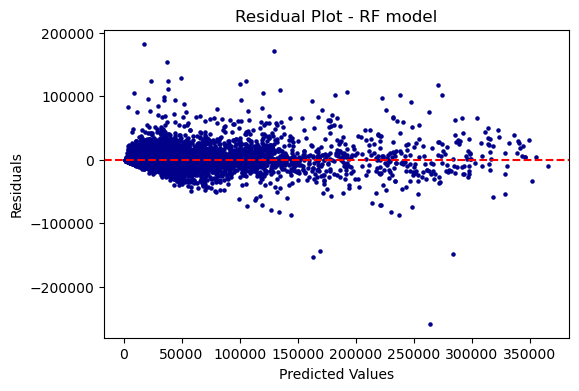

In [44]:
# Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, s = 5, color='darkblue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - RF model')
plt.show()

In [64]:
#  Now we will use the scaled version of Modell_encoded for the merge
# Prepare DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Price': y_test,               
    'Predicted Price': y_pred,
    'Residuals':y_test-y_pred,
    'Abs_residuals':abs(y_test-y_pred),
    'Year' :2024 -  X_test['age'],
    'Power': X_test['power_ps'],
    'Mileage': X_test['mileage_in_km'],
    'Modell_encoded': X_test['Modell_encoded'],
    'Age':X_test['age'],
    'Fuel':X_test['fuel_consumption_l_100km']
})

# Step 3: Extract the original 'model' names from df_clean, including the scaled Modell_encoded
models_df = df_clean[['Modell_encoded', 'model', 'brand']].drop_duplicates()  # Ensure unique Modell_encoded_scaled values

# Step 4: Merge the comparison DataFrame with models_df based on 'Modell_encoded_scaled'
final_comparison_df = pd.merge(comparison_df, models_df, on='Modell_encoded', how='left')

# View the final comparison DataFrame
final_comparison_df


,Actual Price,Predicted Price,Residuals,Abs_residuals,Year,Power,Mileage,Modell_encoded,Age,Fuel,model,brand
0,8685.0,14826.836071,-6141.836071,6141.836071,2014.0,150.0,143623.0,21352.507317,10.0,4.5,Skoda Octavia,skoda
1,29990.0,25180.315628,4809.684372,4809.684372,2017.0,190.0,172661.0,23930.188571,7.0,5.8,Mercedes-Benz Vito,mercedes-benz
2,11900.0,16085.254159,-4185.254159,4185.254159,2009.0,306.0,275000.0,35995.277272,15.0,6.9,BMW 740,bmw
3,35980.0,34722.835575,1257.164425,1257.164425,2023.0,150.0,100.0,27979.466908,1.0,6.5,SEAT Ateca,seat
4,4990.0,5246.859946,-256.859946,256.859946,2005.0,75.0,30000.0,3234.673082,19.0,6.1,Renault Modus,renault
...,...,...,...,...,...,...,...,...,...,...,...,...
47511,23300.0,21901.856982,1398.143018,1398.143018,2015.0,258.0,175100.0,23632.863071,9.0,6.0,BMW X3,bmw
47512,15980.0,16540.675678,-560.675678,560.675678,2015.0,110.0,54000.0,17472.635914,9.0,5.4,Volkswagen Golf Sportsvan,volkswagen
47513,21995.0,18464.467537,3530.532463,3530.532463,2014.0,184.0,63773.0,17731.760717,10.0,6.0,Mercedes-Benz C 200,mercedes-benz
47514,9990.0,11657.735671,-1667.735671,1667.735671,2016.0,86.0,19000.0,11795.147679,8.0,4.7,Kia Picanto,kia


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

SHAP Values for rf model trained on full dataset w/o outliers


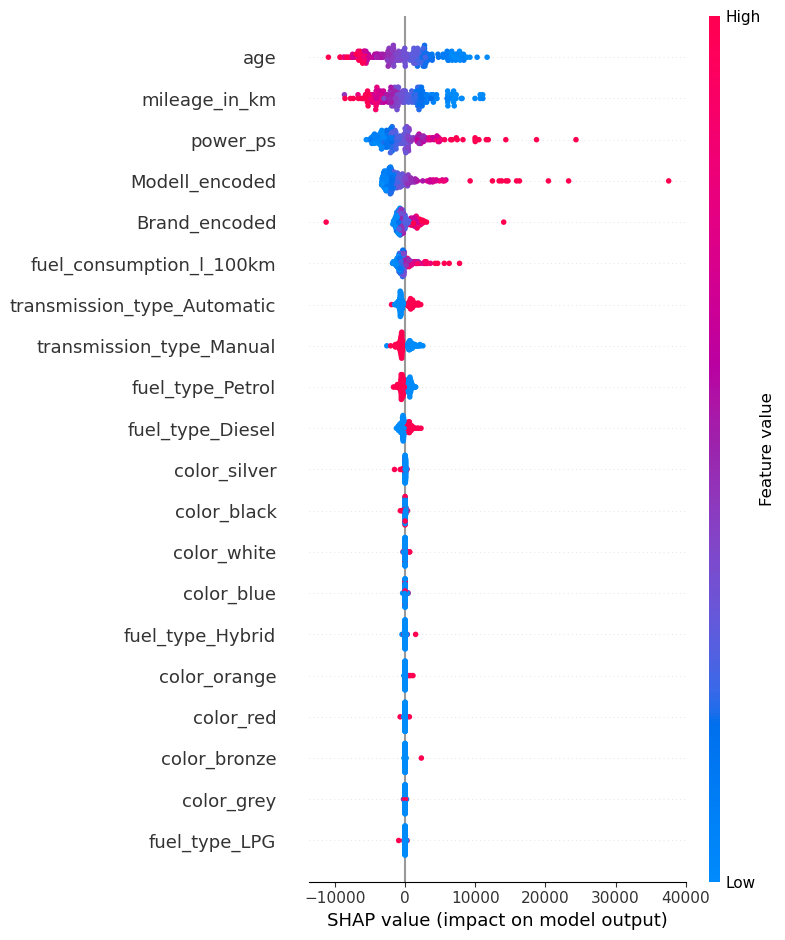

In [46]:
### # Specify how many samples to use for SHAP calculations (e.g., 200 samples)
X_test_sampled = shap.sample(X_test, 200)
# Use the sampled data for KernelExplainer
explainer = shap.KernelExplainer(rf.predict, X_test_sampled)

# Get SHAP values for the sampled data
shap_values = explainer.shap_values(X_test_sampled)
print('SHAP Values for rf model trained on full dataset w/o outliers')
# Create the SHAP summary plot
shap.summary_plot(shap_values, X_test_sampled)

### Cross-validation 

In [56]:
# Define the cross-validation strategy (5-Fold in this case)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
r2_scores = cross_val_score(rf, X, y, cv=cv, scoring='r2')
# Print the R² scores for each fold
print(f'R² scores for each fold: {r2_scores}')

# Compute the mean and standard deviation of the R² scores
print(f'Mean Cross-Validated R²: {r2_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validated R²: {r2_scores.std():.4f}')

R² scores for each fold: [0.93017913 0.92821305 0.92921353 0.92971464 0.93247886]
Mean Cross-Validated R²: 0.9300
Standard Deviation of Cross-Validated R²: 0.0014


## Analysis of errors prediction

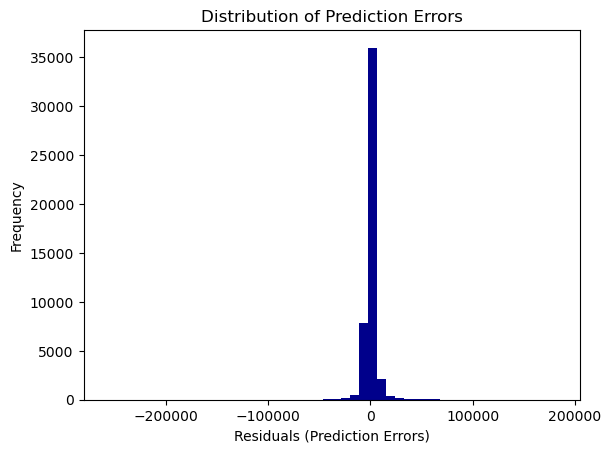

In [47]:
# Plot histogram of residuals
plt.hist(residuals, bins=50, color='darkblue')
plt.xlabel('Residuals (Prediction Errors)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

In [65]:
#First: view the highest values for error prediciton
final_comparison_df.sort_values(by='Residuals').head(20)

,Actual Price,Predicted Price,Residuals,Abs_residuals,Year,Power,Mileage,Modell_encoded,Age,Fuel,model,brand
46871,5499.0,264060.703314,-258561.703314,258561.703314,2008.0,625.0,12453.0,162020.831212,16.0,14.5,Mercedes-Benz SLR,mercedes-benz
37298,9500.0,163097.291496,-153597.291496,153597.291496,2007.0,650.0,46300.0,162020.831212,17.0,14.5,Mercedes-Benz SLR,mercedes-benz
41575,135000.0,284355.773013,-149355.773013,149355.773013,2006.0,579.0,7000.0,129725.812040,18.0,21.5,Lamborghini Murciélago,lamborghini
23535,24990.0,169543.073283,-144553.073283,144553.073283,2018.0,585.0,21600.0,195424.454381,6.0,13.1,Mercedes-Benz G 63 AMG,mercedes-benz
5304,149800.0,237764.858088,-87964.858088,87964.858088,2022.0,510.0,2200.0,191615.125846,2.0,12.4,Porsche 992,porsche
11123,56980.0,144513.310041,-87533.310041,87533.310041,2019.0,450.0,25500.0,191615.125846,5.0,8.9,Porsche 992,porsche
41560,149000.0,230910.267118,-81910.267118,81910.267118,2022.0,528.0,62.0,177638.396857,2.0,10.9,Bentley Flying Spur,bentley
14202,51885.0,133731.211747,-81846.211747,81846.211747,2021.0,612.0,17343.0,81770.511502,3.0,11.5,Mercedes-Benz GLE 63 AMG,mercedes-benz
31697,48500.0,127241.769539,-78741.769539,78741.769539,2016.0,476.0,33423.0,130226.361345,8.0,12.4,Porsche 911,porsche
6442,174450.0,248693.736362,-74243.736362,74243.736362,2022.0,650.0,6250.0,191615.125846,2.0,11.1,Porsche 992,porsche


In [66]:
final_comparison_df.sort_values(by='Residuals').tail(20)

,Actual Price,Predicted Price,Residuals,Abs_residuals,Year,Power,Mileage,Modell_encoded,Age,Fuel,model,brand
32116,115890.0,21083.053247,94806.946753,94806.946753,2015.0,204.0,162000.0,22014.278177,9.0,4.5,Mercedes-Benz C 250,mercedes-benz
11334,319963.0,222769.836985,97193.163015,97193.163015,2013.0,571.0,18500.0,245042.017255,11.0,13.2,Mercedes-Benz SLS,mercedes-benz
1930,133785.0,34516.821217,99268.178783,99268.178783,2020.0,197.0,24000.0,22105.985007,4.0,6.1,Audi TT,audi
28323,375990.0,274791.651012,101198.348988,101198.348988,2022.0,585.0,9900.0,195424.454381,2.0,18.1,Mercedes-Benz G 63 AMG,mercedes-benz
42842,339900.0,238555.332993,101344.667007,101344.667007,2018.0,606.0,157.0,156788.928571,6.0,9.1,Porsche 991,porsche
27726,285000.0,182529.225355,102470.774645,102470.774645,2018.0,446.0,310.0,113987.316378,6.0,13.8,Aston Martin V8,aston-martin
25309,224800.0,120146.671652,104653.328348,104653.328348,2023.0,503.0,9000.0,70108.073977,1.0,11.3,Mercedes-Benz S 580,mercedes-benz
14857,115000.0,9228.890887,105771.109113,105771.109113,2006.0,306.0,267000.0,25431.808539,18.0,11.6,Mercedes-Benz GL 420,mercedes-benz
885,299000.0,192238.818547,106761.181453,106761.181453,2023.0,530.0,2500.0,109099.694535,1.0,8.3,Land Rover Range Rover,land-rover
12162,245000.0,135192.011557,109807.988443,109807.988443,2016.0,581.0,70000.0,130226.361345,8.0,9.1,Porsche 911,porsche


In [67]:
#View the most precise predications
final_comparison_df.sort_values(by='Abs_residuals').head(20)

,Actual Price,Predicted Price,Residuals,Abs_residuals,Year,Power,Mileage,Modell_encoded,Age,Fuel,model,brand
31559,5800.0,5799.995591,0.004409,0.004409,2007.0,163.0,289745.0,16579.259538,17.0,6.9,BMW 320,bmw
44294,6990.0,6989.929076,0.070924,0.070924,2010.0,105.0,250000.0,20751.802191,14.0,6.2,Volkswagen Caddy,volkswagen
13529,29980.0,29979.911637,0.088363,0.088363,2022.0,150.0,4672.0,14686.507599,2.0,5.6,Volkswagen Golf Variant,volkswagen
34394,8500.0,8500.099047,-0.099047,0.099047,2008.0,116.0,68000.0,6857.726889,16.0,6.6,Mercedes-Benz B 170,mercedes-benz
29774,63990.0,63989.893635,0.106365,0.106365,2022.0,374.0,22000.0,52052.944771,2.0,8.0,BMW 440,bmw
34256,1900.0,1900.156908,-0.156908,0.156908,2003.0,64.0,210000.0,9972.500162,21.0,5.9,Volkswagen Polo,volkswagen
9197,13290.0,13290.194036,-0.194036,0.194036,2016.0,150.0,85000.0,12268.885175,8.0,5.4,Opel Astra,opel
9348,28480.0,28479.628535,0.371465,0.371465,2022.0,98.0,5.0,27503.027928,2.0,3.8,Toyota C-HR,toyota
1278,19919.0,19919.397503,-0.397503,0.397503,2018.0,116.0,46398.0,21590.094768,6.0,5.0,SEAT Arona,seat
39460,8990.0,8989.592593,0.407407,0.407407,2014.0,75.0,66095.0,11889.005150,10.0,4.2,smart forTwo,smart


### where high prediction errors are linked to high power (overestimation) or high mileage (underestimation)—is quite common. This suggests that power and mileage may not be perfectly linearly related to the price or that the Random Forest model might be struggling to properly capture their non-linear relationships.

In [68]:
outlier_threshold = 2.5 * np.std(residuals)  # Set a threshold for residuals
outliers = final_comparison_df[abs(final_comparison_df['Residuals']) > outlier_threshold]
outliers

,Actual Price,Predicted Price,Residuals,Abs_residuals,Year,Power,Mileage,Modell_encoded,Age,Fuel,model,brand
96,35840.0,18791.192408,17048.807592,17048.807592,2010.0,131.0,39114.0,15274.225362,14.0,9.1,Volkswagen T5 Kombi,volkswagen
217,149900.0,99929.065456,49970.934544,49970.934544,2021.0,330.0,69000.0,90569.037342,3.0,10.7,Mercedes-Benz G 400,mercedes-benz
261,65900.0,23526.667335,42373.332665,42373.332665,2020.0,150.0,148500.0,37398.729961,4.0,5.0,Volvo XC60,volvo
335,137700.0,93377.597148,44322.402852,44322.402852,2022.0,381.0,3500.0,54650.080776,2.0,9.4,Mercedes-Benz SL 43 AMG,mercedes-benz
452,57850.0,39395.258923,18454.741077,18454.741077,2018.0,354.0,84190.0,40424.246057,6.0,8.3,Audi SQ5,audi
...,...,...,...,...,...,...,...,...,...,...,...,...
47413,214900.0,190816.459125,24083.540875,24083.540875,2019.0,585.0,8100.0,137731.099557,5.0,12.4,Mercedes-Benz AMG GT,mercedes-benz
47474,43491.0,25993.780991,17497.219009,17497.219009,2017.0,242.0,49985.0,23339.566867,7.0,8.7,Ford Kuga,ford
47475,49555.0,30453.816946,19101.183054,19101.183054,2006.0,476.0,129000.0,26411.525781,18.0,13.6,Mercedes-Benz CLS 55 AMG,mercedes-benz
47481,134980.0,115549.497021,19430.502979,19430.502979,2018.0,680.0,50000.0,82593.542222,6.0,3.6,Porsche Panamera,porsche


  price_range  count
0        >50k    704
1     30k-40k     91
2     40k-50k     90
3     20k-30k     85
4     10k-20k     73
5        <10k     16


/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_65220/2558922818.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['price_range'] = pd.cut(outliers['Actual Price'], bins=bins, labels=labels)


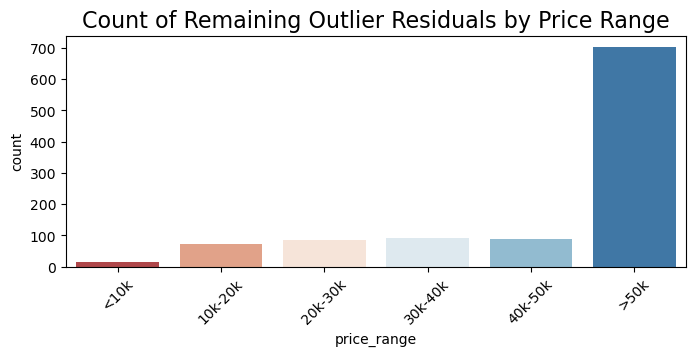

In [72]:
# Define price bins
bins = [0, 10000, 20000, 30000, 40000, 50000, float('inf')]
labels = ['<10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '>50k']

# Create a new column for price ranges
outliers['price_range'] = pd.cut(outliers['Actual Price'], bins=bins, labels=labels)

# Group by price range
price_range_distribution =outliers['price_range'].value_counts().reset_index()
price_range_distribution.columns = ['price_range', 'count']

# Display the distribution
print(price_range_distribution)
# Visualize the price ranges
plt.figure(figsize=(8, 3))
sns.barplot(data=price_range_distribution, x='price_range', y='count', palette='RdBu')
plt.title('Count of Remaining Outlier Residuals by Price Range', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [73]:
outliers['model'].nunique()

347

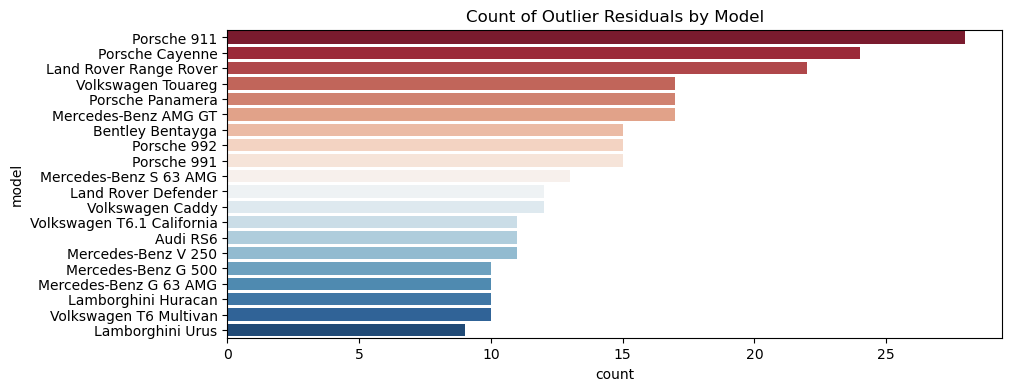

In [74]:
plt.figure(figsize=(10, 4))
sns.countplot(data=outliers, y='model', order=outliers['model'].value_counts().head(20).index, palette='RdBu')
plt.title('Count of Outlier Residuals by Model')

plt.show()

In [75]:
#I will try to define the outliers for the price for every brand:


df = pd.read_csv("auto_data_cleaned_16_09_2024.csv")

def detect_outliers_iqr(group):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = group['price_in_euro'].quantile(0.25)
    Q3 = group['price_in_euro'].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter prices outside the bounds
    outliers = group[(group['price_in_euro'] < lower_bound) | (group['price_in_euro'] > upper_bound)]
    
    return outliers

# Apply the function to each brand
outliers_iqr = df.groupby('model').apply(detect_outliers_iqr).reset_index(drop=True)
outliers_iqr['Actual Price'] = outliers_iqr['price_in_euro']
outliers_iqr

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,offer_description,age,Actual Price
0,alfa-romeo,Alfa Romeo,grey,2022.0,39900.0,131.0,Automatic,Petrol,6.2,18500.0,Tonale EDIZIONE SPECIALE 1.5T 130PS/LEDER/LED,2.0,39900.0
1,alfa-romeo,Alfa Romeo,grey,2023.0,48340.0,131.0,Automatic,Petrol,6.2,50.0,1.5T MHEV SPECIALE - Premium WinterPaket,1.0,48340.0
2,alfa-romeo,Alfa Romeo 147,black,2003.0,17500.0,250.0,Manual,Petrol,12.1,138500.0,3.2 V6 24V GTA Sammlerstück,21.0,17500.0
3,alfa-romeo,Alfa Romeo 147,black,2003.0,17999.0,250.0,Manual,Petrol,12.1,99700.0,Spider 2.0 JTS Medio,21.0,17999.0
4,alfa-romeo,Alfa Romeo 147,blue,2004.0,24990.0,250.0,Manual,Petrol,12.1,145000.0,3.2 V6 24V GTA,20.0,24990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297,smart,smart forTwo,white,2019.0,29999.0,121.0,Automatic,Petrol,4.1,19936.0,cabrio BRABUS Xclusive HP121: WHITEnRED!,5.0,29999.0
5298,smart,smart forTwo,white,2019.0,29999.0,122.0,Automatic,Petrol,4.1,12800.0,122 PS 185Km/h Brabus Xclusive Navi Kamera JBL,5.0,29999.0
5299,smart,smart forTwo,white,2019.0,34999.0,122.0,Automatic,Petrol,4.1,19766.0,122 PS 185 Km/h Brabus Xclusive Tailor Made Cam,5.0,34999.0
5300,smart,smart forTwo,white,2019.0,35800.0,122.0,Automatic,Petrol,4.1,13258.0,122 PS 185 Km/h Brabus Xclusive Kamera Navi JBL,5.0,35800.0


In [76]:
# Merge the two DataFrames on brand and price
matches = pd.merge(outliers_iqr, outliers, on=['model', 'Actual Price'])

# Check the matches
print("Matching Outliers:")
matches

Matching Outliers:


,brand_x,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,...,Residuals,Abs_residuals,Year,Power,Mileage,Modell_encoded,Age,Fuel,brand_y,price_range
0,alfa-romeo,Alfa Romeo Spider,red,2009.0,49999.0,260.0,Manual,Petrol,11.5,5390.0,...,27098.781920,27098.781920,2009.0,260.0,5390.0,11447.487664,15.0,11.5,alfa-romeo,40k-50k
1,audi,Audi A1,white,2019.0,46300.0,150.0,Automatic,Petrol,5.1,47350.0,...,21409.016149,21409.016149,2019.0,150.0,47350.0,19601.413011,5.0,5.1,audi,40k-50k
2,audi,Audi A1,white,2022.0,83985.0,110.0,Automatic,Petrol,4.9,1015.0,...,51830.095436,51830.095436,2022.0,110.0,1015.0,19601.413011,2.0,4.9,audi,>50k
3,audi,Audi A3,grey,2016.0,45800.0,150.0,Manual,Petrol,5.2,106500.0,...,27964.187668,27964.187668,2016.0,150.0,106500.0,18138.761452,8.0,5.2,audi,40k-50k
4,audi,Audi A3,silver,2018.0,49999.0,116.0,Manual,Diesel,4.2,143200.0,...,31452.809616,31452.809616,2018.0,116.0,143200.0,18138.761452,6.0,4.2,audi,40k-50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,volvo,Volvo XC40,blue,2019.0,52990.0,150.0,Manual,Diesel,4.8,49250.0,...,24859.668380,24859.668380,2019.0,150.0,49250.0,35630.221298,5.0,4.8,volvo,>50k
296,volvo,Volvo XC40,grey,2021.0,52990.0,211.0,Automatic,Hybrid,1.8,9600.0,...,24859.668380,24859.668380,2019.0,150.0,49250.0,35630.221298,5.0,4.8,volvo,>50k
297,volvo,Volvo XC40,black,2020.0,60890.0,211.0,Automatic,Other,1.8,26300.0,...,18676.987919,18676.987919,2020.0,211.0,26300.0,35630.221298,4.0,1.8,volvo,>50k
298,volvo,Volvo XC40,blue,2022.0,71850.0,197.0,Automatic,Petrol,7.2,20026.0,...,32763.980584,32763.980584,2022.0,197.0,20026.0,35630.221298,2.0,7.2,volvo,>50k


In [77]:
#I want to get insights for those error which are coming not form the price outliers

# Merge the DataFrames to find matches, including the 'brand' column from `outliers`
merged = outliers.merge(matches[['model', 'Actual Price']], on=['model', 'Actual Price'], how='left', indicator=True)

# Now, retain the 'brand' column in the resulting DataFrame
remaining_outliers = merged[merged['_merge'] == 'left_only']
remaining_outliers.shape


(783, 14)

In [78]:
# Step 4: Merge the comparison DataFrame with models_df based on 'Modell_encoded_scaled'
remaining_outliers = pd.merge(remaining_outliers, models_df, on='model', how='left')
remaining_outliers

,Actual Price,Predicted Price,Residuals,Abs_residuals,Year,Power,Mileage,Modell_encoded_x,Age,Fuel,model,brand_x,price_range,_merge,Modell_encoded_y,brand_y
0,149900.0,99929.065456,49970.934544,49970.934544,2021.0,330.0,69000.0,90569.037342,3.0,10.7,Mercedes-Benz G 400,mercedes-benz,>50k,left_only,90569.037342,mercedes-benz
1,65900.0,23526.667335,42373.332665,42373.332665,2020.0,150.0,148500.0,37398.729961,4.0,5.0,Volvo XC60,volvo,>50k,left_only,37398.729961,volvo
2,137700.0,93377.597148,44322.402852,44322.402852,2022.0,381.0,3500.0,54650.080776,2.0,9.4,Mercedes-Benz SL 43 AMG,mercedes-benz,>50k,left_only,54650.080776,mercedes-benz
3,57850.0,39395.258923,18454.741077,18454.741077,2018.0,354.0,84190.0,40424.246057,6.0,8.3,Audi SQ5,audi,>50k,left_only,40424.246057,audi
4,24855.0,41978.253222,-17123.253222,17123.253222,2021.0,218.0,21950.0,36586.695312,3.0,7.7,Volkswagen Arteon,volkswagen,20k-30k,left_only,36586.695312,volkswagen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,214900.0,190816.459125,24083.540875,24083.540875,2019.0,585.0,8100.0,137731.099557,5.0,12.4,Mercedes-Benz AMG GT,mercedes-benz,>50k,left_only,137731.099557,mercedes-benz
779,43491.0,25993.780991,17497.219009,17497.219009,2017.0,242.0,49985.0,23339.566867,7.0,8.7,Ford Kuga,ford,40k-50k,left_only,23339.566867,ford
780,49555.0,30453.816946,19101.183054,19101.183054,2006.0,476.0,129000.0,26411.525781,18.0,13.6,Mercedes-Benz CLS 55 AMG,mercedes-benz,40k-50k,left_only,26411.525781,mercedes-benz
781,134980.0,115549.497021,19430.502979,19430.502979,2018.0,680.0,50000.0,82593.542222,6.0,3.6,Porsche Panamera,porsche,>50k,left_only,82593.542222,porsche


In [79]:
# Grouping by brand and model
grouped_by_brand_model = remaining_outliers.groupby(['brand_x']).size().reset_index(name='count')

# Display the grouped results
print(grouped_by_brand_model.sort_values(by='count', ascending=False))

          brand_x  count
20  mercedes-benz    173
25        porsche    102
2            audi     84
32     volkswagen     57
18     land-rover     51
4             bmw     46
10        ferrari     43
3         bentley     40
1    aston-martin     28
17    lamborghini     27
12           ford     20
19       maserati     17
9           dodge     14
15           jeep     10
33          volvo      8
31         toyota      7
14         jaguar      6
22         nissan      5
23           opel      5
24        peugeot      5
11           fiat      4
26        renault      4
13        hyundai      4
5        cadillac      4
8         citroen      3
16            kia      3
0      alfa-romeo      3
6       chevrolet      2
28           seat      2
29          skoda      2
7        chrysler      1
21     mitsubishi      1
27          rover      1
30      ssangyong      1


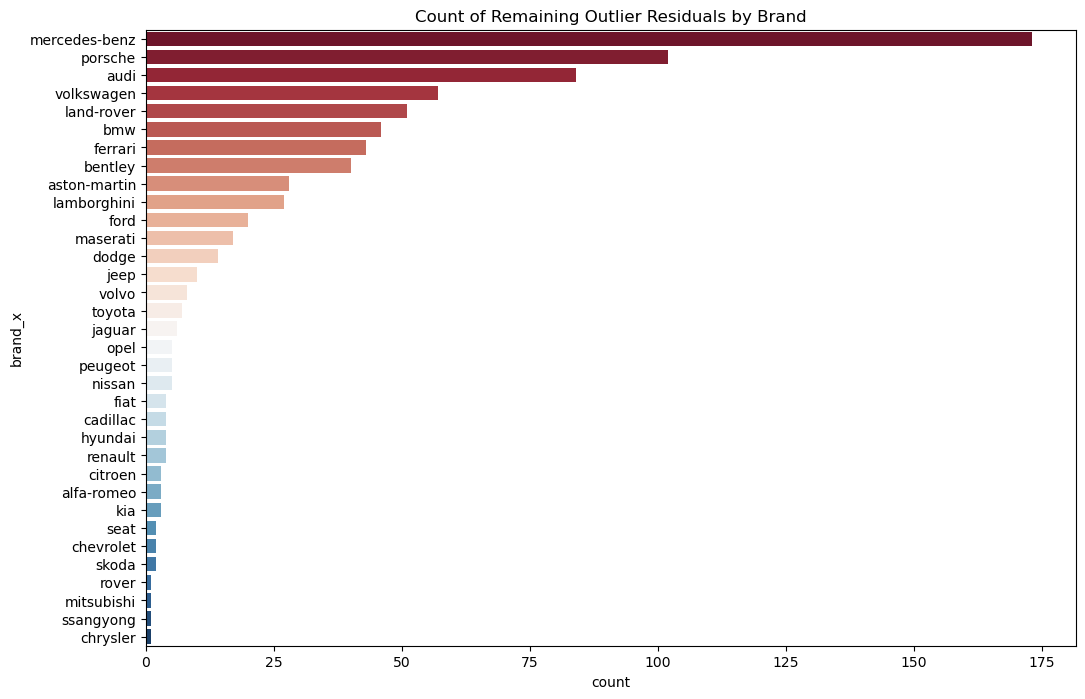

In [82]:
plt.figure(figsize=(12, 8))
sns.countplot(data=remaining_outliers, y='brand_x', order=remaining_outliers['brand_x'].value_counts().index, palette='RdBu')
plt.title('Count of Remaining Outlier Residuals by Brand')

plt.show()

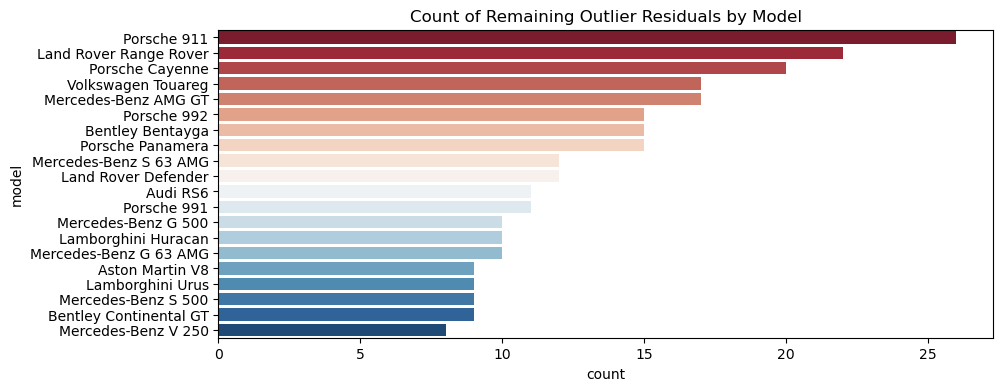

In [83]:
plt.figure(figsize=(10, 4))
sns.countplot(data=remaining_outliers, y='model', order=remaining_outliers['model'].value_counts().head(20).index, palette='RdBu')
plt.title('Count of Remaining Outlier Residuals by Model')

plt.show()

  price_range  count
0        >50k    518
1     20k-30k     74
2     10k-20k     61
3     40k-50k     60
4     30k-40k     56
5        <10k     14


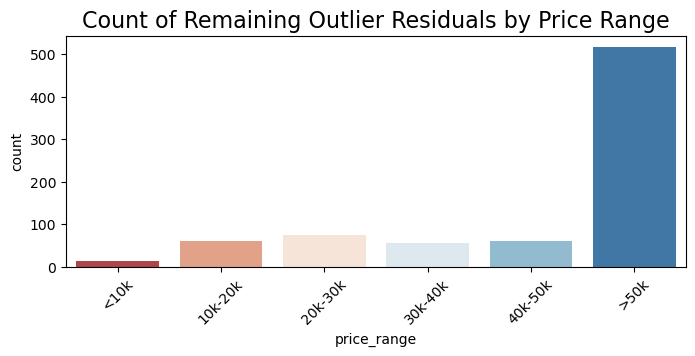

In [84]:
# Define price bins
bins = [0, 10000, 20000, 30000, 40000, 50000, float('inf')]
labels = ['<10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '>50k']

# Create a new column for price ranges
remaining_outliers['price_range'] = pd.cut(remaining_outliers['Actual Price'], bins=bins, labels=labels)

# Group by price range
price_range_distribution = remaining_outliers['price_range'].value_counts().reset_index()
price_range_distribution.columns = ['price_range', 'count']

# Display the distribution
print(price_range_distribution)
# Visualize the price ranges
plt.figure(figsize=(8, 3))
sns.barplot(data=price_range_distribution, x='price_range', y='count', palette='RdBu')
plt.title('Count of Remaining Outlier Residuals by Price Range', fontsize=16)
plt.xticks(rotation=45)
plt.show()

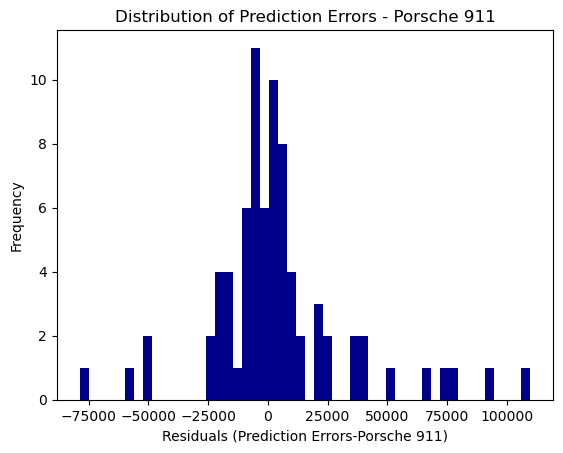

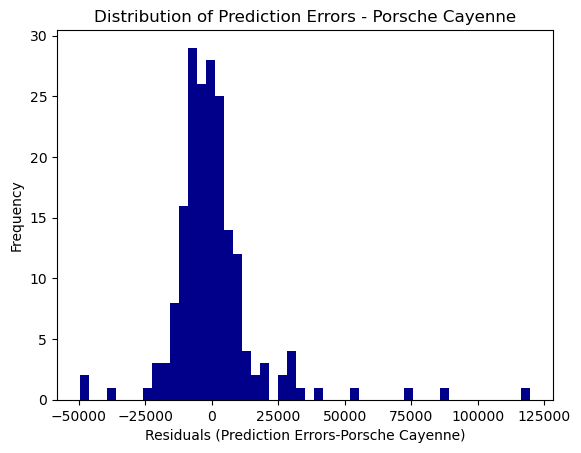

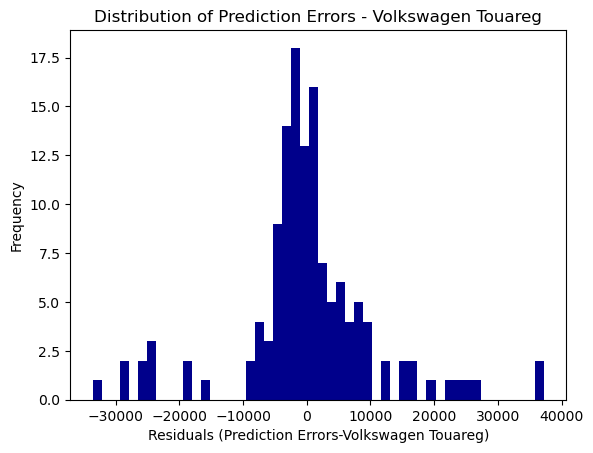

In [85]:
# Plot histogram of residuals for Porsche 911
plt.hist(final_comparison_df['Residuals'].loc[final_comparison_df['model']=='Porsche 911'], bins=50, color='darkblue')
plt.xlabel('Residuals (Prediction Errors-Porsche 911)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors - Porsche 911')
plt.show()
# Plot histogram of residuals for Porsche Cayenne
plt.hist(final_comparison_df['Residuals'].loc[final_comparison_df['model']=='Porsche Cayenne'], bins=50, color='darkblue')
plt.xlabel('Residuals (Prediction Errors-Porsche Cayenne)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors - Porsche Cayenne')
plt.show()

# Plot histogram of residuals for Porsche Cayenne
plt.hist(final_comparison_df['Residuals'].loc[final_comparison_df['model']=='Volkswagen Touareg'], bins=50, color='darkblue')
plt.xlabel('Residuals (Prediction Errors-Volkswagen Touareg)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors - Volkswagen Touareg')
plt.show()

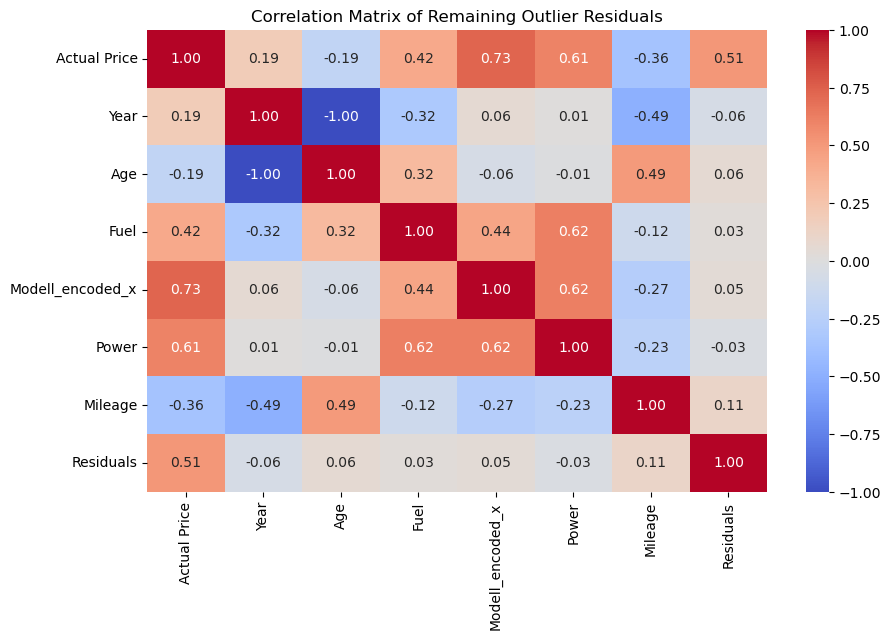

In [198]:

# Calculate correlation matrix
correlation_matrix = remaining_outliers[['Actual Price', 'Year', 'Age','Fuel', 'Modell_encoded_x', 'Power','Mileage','Residuals']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Remaining Outlier Residuals')
plt.show()

### Insights and Recommendations
Strong Positive Correlation with Actual Price:

No Correlation with Year:
Since the correlation with the year is negligible, it may not be worth focusing on this feature for improving the model. 

Weak Relationships:
The weak correlations with model, power, and mileage indicate that these features alone may not sufficiently explain the residuals. 

### Conclusion
While predicting prices for normal cars that may have unrecorded incidents or unique features is challenging, employing a combination of enhanced feature engineering, external data integration, robust modeling techniques, and ongoing validation can significantly improve your model's performance. Keep an open feedback loop and continuously iterate on your model as you gather more insights and data.

### Maybe I try clustering

In [199]:
from sklearn.preprocessing import StandardScaler

# Assuming `remaining_outliers` is your DataFrame of outlier residuals
features = remaining_outliers[['Actual Price', 'Year', 'Modell_encoded_x', 'Power','Mileage','Residuals', 'Fuel']]  # Select relevant features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

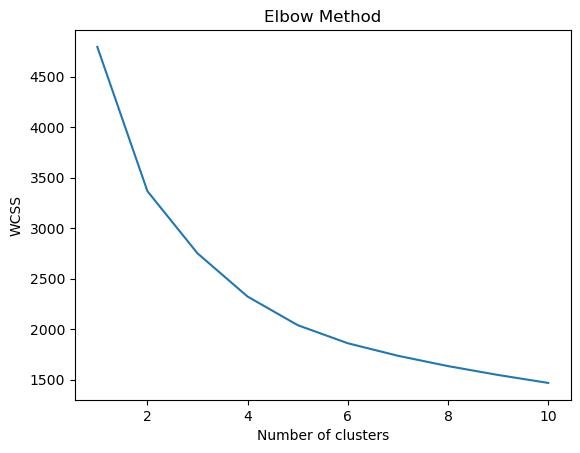

In [200]:
from sklearn.cluster import KMeans

wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [228]:
optimal_clusters = 5 # Replace with the optimal number from your analysis
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to your DataFrame
remaining_outliers['cluster'] = kmeans.labels_

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


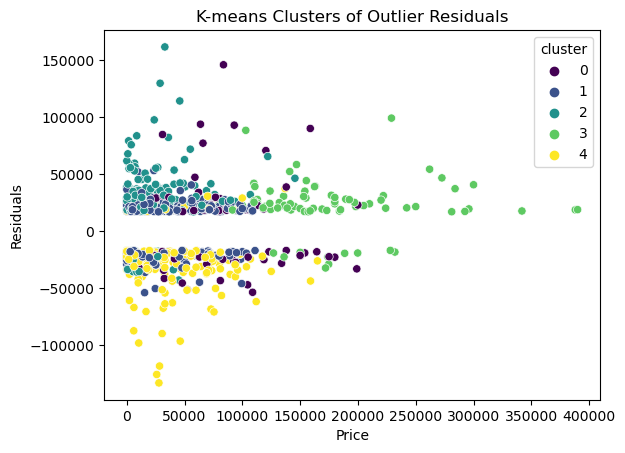

In [229]:
import seaborn as sns

# Plot the clusters
sns.scatterplot(x=remaining_outliers['Mileage'], y=remaining_outliers['Residuals'], hue=remaining_outliers['cluster'], palette='viridis')
plt.title('K-means Clusters of Outlier Residuals')
plt.xlabel('Price')
plt.ylabel('Residuals')
plt.show()

In [230]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)  # You can change to n_components=3 for 3D visualization
tsne_results = tsne.fit_transform(scaled_features)

# Add the t-SNE results to your DataFrame
remaining_outliers['tsne-2d-one'] = tsne_results[:, 0]
remaining_outliers['tsne-2d-two'] = tsne_results[:, 1]

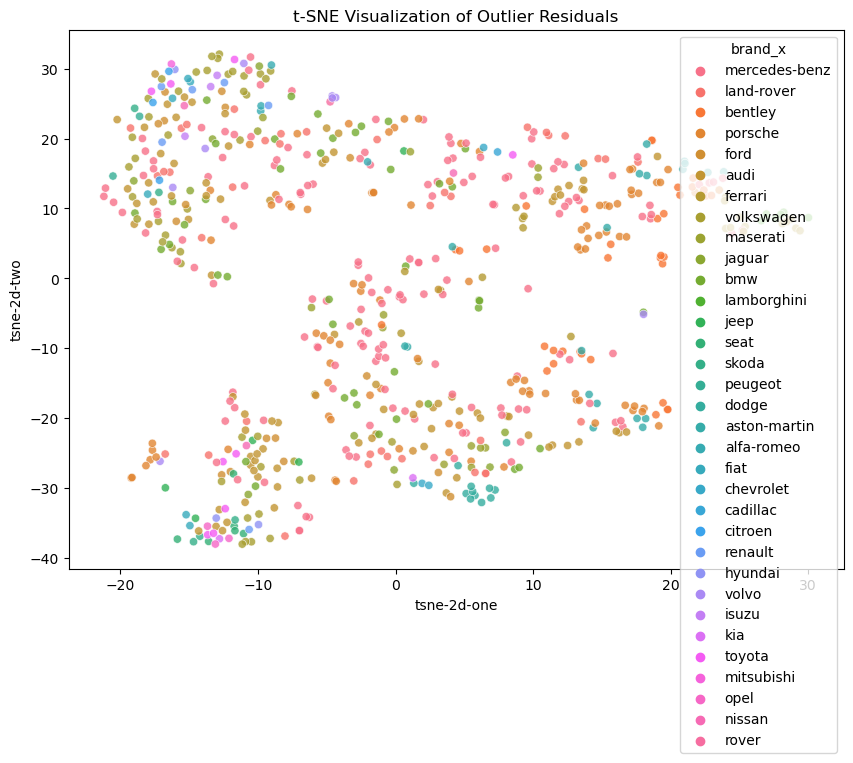

In [231]:


plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='tsne-2d-one', 
    y='tsne-2d-two',
    hue='brand_x',  # You can also use 'cluster' if you want to visualize K-means clusters
 #   palette=sns.color_palette('hsv', as_cmap=True),
    data=remaining_outliers,
    legend='full',
    alpha=0.8
)
plt.title('t-SNE Visualization of Outlier Residuals')
plt.show()

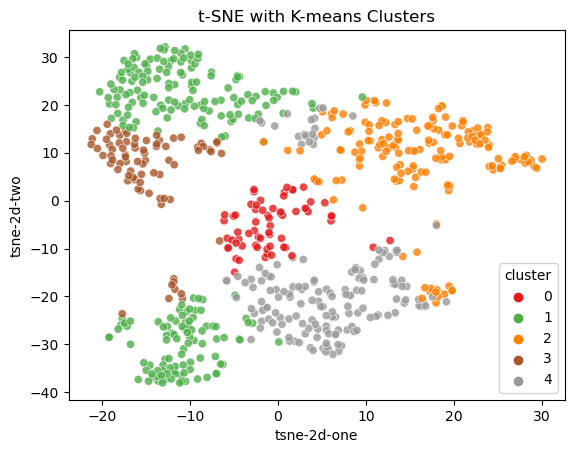

In [232]:
# Assuming you have already created K-means clusters
sns.scatterplot(
    x='tsne-2d-one', 
    y='tsne-2d-two',
    hue='cluster',  # Visualize K-means clusters
    palette=sns.color_palette('Set1', as_cmap=True),
    data=remaining_outliers,
    legend='full',
    alpha=0.8
)
plt.title('t-SNE with K-means Clusters')
plt.show()

In [233]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  # You can adjust perplexity
tsne_results = tsne.fit_transform(scaled_features)

In [234]:
# Example: Summarize the features by cluster
cluster_summary = remaining_outliers.groupby('cluster').agg({
    'Actual Price': ['mean', 'median', 'std','min', 'max'],
    'Mileage': ['mean', 'median', 'std', 'min','max'],
    'Power': ['mean', 'median', 'min', 'max'],
    'Residuals':['mean', 'median', 'min', 'max'],
    'Year': ['mean', 'median', 'min', 'max'],
    
})
cluster_summary

Actual Price                                             \
                  mean    median           std      min       max   
cluster                                                             
0         71569.553846   56950.0  58817.137205   1695.0  239000.0   
1         55459.969565   53415.0  29865.065244   5000.0  159900.0   
2        204961.641026  198950.0  46650.513862  94900.0  279990.0   
3         50129.792208   43900.0  25644.777286   3900.0  139999.0   
4         68095.229299   62000.0  39695.073455   7590.0  174450.0   

               Mileage                                             ...  Power  \
                  mean    median           std      min       max  ...    min   
cluster                                                            ...          
0         87537.384615   81000.0  45507.305316  10771.0  199900.0  ...  150.0   
1         39988.100000   37174.0  31735.093901      2.0  111000.0  ...   86.0   
2         25349.519231   15505.5  27651.047081     10.0  145500.0  ...  330.0   
3        178924.077922  162500.0  65256.057697  80000.0  390000.0  ...   90.0   
4         42938.955414   33345.0  35041.806715      1.0  165000.0  ...  286.0   

                   Residuals                                              \
           max          mean        median            min            max   
cluster                                                                    
0        640.0   6965.831770  17073.315643  -53656.572480  145794.410205   
1        680.0   3731.629330  17512.613820  -54005.500802   53706.453581   
2        900.0  29096.714641  27185.401649  -42914.080893  161440.313244   
3        469.0  22121.844867  22496.070413  -32334.473834   99045.479519   
4        760.0 -27213.717886 -24769.593279 -133110.255771   37186.489049   

                Year                          
                mean  median     min     max  
cluster                                       
0        2005.584615  2006.0  1995.0  2014.0  
1        2019.500000  2019.0  2012.0  2023.0  
2        2019.064103  2020.0  2008.0  2023.0  
3        2014.090909  2015.0  1999.0  2021.0  
4        2018.101911  2018.0  2007.0  2023.0  

[5 rows x 22 columns]

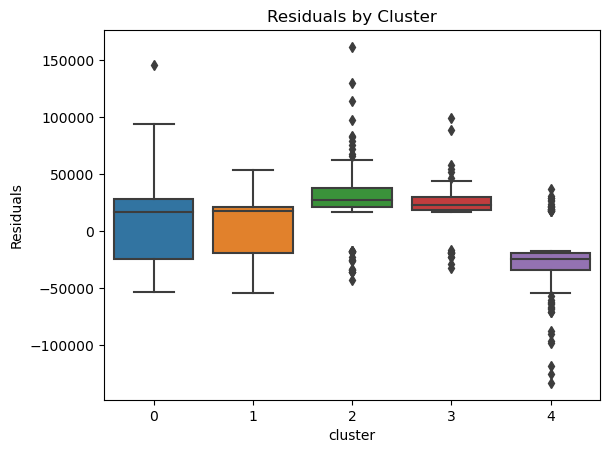

In [235]:
sns.boxplot(x='cluster', y='Residuals', data=remaining_outliers)
plt.title('Residuals by Cluster')
plt.show()

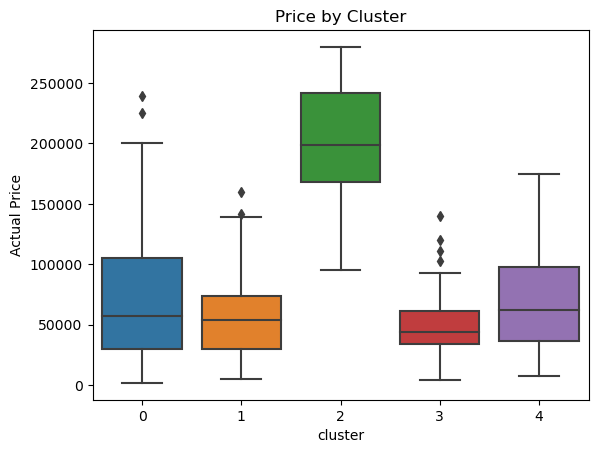

In [236]:
sns.boxplot(x='cluster', y='Actual Price', data=remaining_outliers)
plt.title('Price by Cluster')
plt.show()

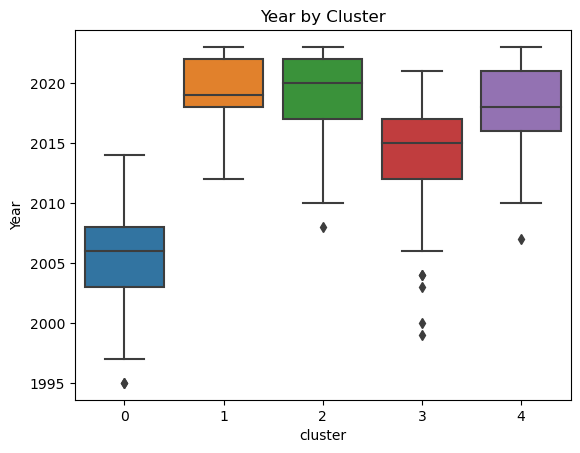

In [237]:
sns.boxplot(x='cluster', y='Year', data=remaining_outliers)
plt.title('Year by Cluster')
plt.show()

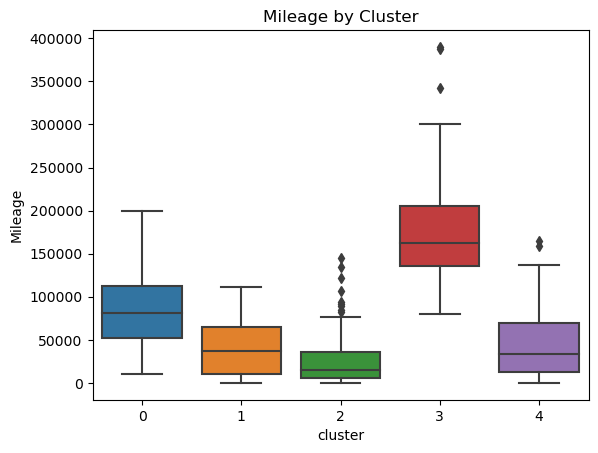

In [238]:
sns.boxplot(x='cluster', y='Mileage', data=remaining_outliers)
plt.title('Mileage by Cluster')
plt.show()

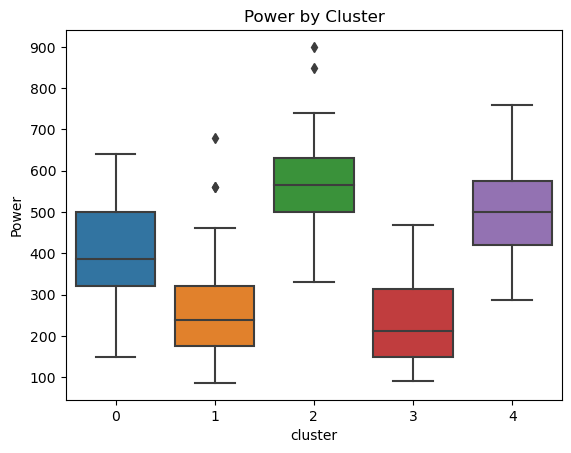

In [239]:
sns.boxplot(x='cluster', y='Power', data=remaining_outliers)
plt.title('Power by Cluster')
plt.show()

## Bonus: random forest models without colors

In [244]:
#cleaned dataset
df = pd.read_csv("auto_data_cleaned_16_09_2024.csv")

# the models will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['model'])
df['Modell_encoded'] = target_encoder.fit_transform(df['model'], df['price_in_euro'])  # 'Preis' ist die Zielvariable


# the brand will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['brand'])
df['Brand_encoded'] = target_encoder.fit_transform(df['brand'], df['price_in_euro'])  # 'Preis' ist die Zielvariable

df=df.drop(columns=['year', 'color', 'offer_description' ])

df = pd.get_dummies(df, columns=[ 'fuel_type', 'transmission_type'], dtype='int')

# Remove outliers using Z-score for price and mileage
df_clean = df[(np.abs(stats.zscore(df['price_in_euro'])) <10)]  # 4 is the higher threshold for outliers
df_clean = df_clean[(np.abs(stats.zscore(df_clean['mileage_in_km'])) < 4)]  # Do the same for mileage


In [245]:
# Splitting the data into training and test sets
X = df_clean.drop(['price_in_euro', 'model', 'brand'], axis=1)  # Features
y = df_clean['price_in_euro']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [246]:
# Initialize the model with default parameters=1
rf = RandomForestRegressor(n_estimators=200, max_depth=20, bootstrap =False, max_features = 'sqrt', min_samples_leaf=1, min_samples_split=2)
# Train the model
rf.fit(X_train, y_train)

# Step 4: Evaluate the model on the Test Set
y_pred = rf.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Test MAE - full dataset: {test_mae}")
print(f"Test Set MSE - full dataset: {mse_test}")
print(f"Test R² - full dataset: {test_r2}")

Test MAE - full dataset: 2978.043558977225
Test Set MSE - full dataset: 45490393.05291386
Test R² - full dataset: 0.9370739292841865


### Conclusion:
    Removal of colors did not disturb the perfomance of the model, despite the expectations from ANOVA tests

### 1. ANOVA Result: Color Significance
The ANOVA test shows that for certain models and years, color can have a statistically significant effect on car price. This means that, in some contexts, color might be one of many factors consumers are willing to pay more or less for, potentially due to preferences or trends in specific car models or market segments.



### 2. Model Performance Without Color
Despite color being statistically significant in certain cases, removing it from the predictive model didn’t affect the performance of your best models (Random Forest and XGBoost). This is not a contradiction but rather reflects the difference between statistical significance and predictive importance.


### 3. Interpreting the Discrepancy
Statistical vs. Predictive Importance: Statistical significance simply means that color has an impact on price in specific cases. However, in terms of overall predictive power, other features (like mileage, age, and power) seem to capture the key factors driving price prediction more comprehensively.
Complexity of Interactions: The models may be implicitly capturing any effects related to color through combinations of other features. Since car color might have subtle interactions with car type, age, and brand, models like Random Forest and XGBoost might capture some of these effects without needing color as an explicit feature.
